In [1]:
#Triple Exponential Smoothing, also known as the Holt-Winters method, is one of the many methods or algorithms that can be used to forecast data points in a series, provided that the series is “seasonal”, i.e. repetitive over some period.


In [3]:
series = [3,10,12,13,12,10,12]

In [ ]:
Naive Method
This is the most primitive forecasting method. The premise of the naive method is that the expected point is equal to the last observed point:

y^x+1=yx
Using this method we would forecast the next point to be 12.

In [7]:
# Simple Average
# We take all the values we know, calculate the average and bet that that’s going to be the next value.

def average(series):
    return float(sum(series))/len(series)
print(average(series))

10.285714285714286


In [10]:
# moving average using n last points
def moving_average(series, n):
    return average(series[-n:])

print(moving_average(series, 3))
moving_average(series, 4)


11.333333333333334


11.75

In [12]:
# weighted average, weights is a list of weights
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

weights = [0.1, 0.2, 0.3, 0.4]
print(weighted_average(series, weights))
# 11.5

11.500000000000002


In [21]:
from matplotlib import pyplot as plt
moving_avg_3 = [3,10,12,13,12,10,12,11.33]
moving_avg_4 = [3,10,12,13,12,10,12,11.75]
moving_avg_weight = [3,10,12,13,12,10,12,11.50]

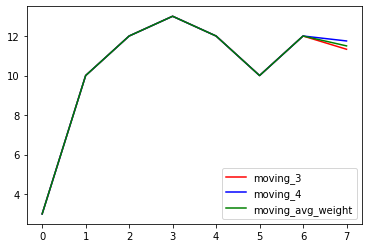

In [23]:
plt.plot(moving_avg_3, label='moving_3', color="r")
plt.plot(moving_avg_4, label='moving_4', color="b")
plt.plot(moving_avg_weight, label='moving_avg_weight', color="g")
plt.legend()
plt.show()

In [25]:
# given a series and alpha, return series of smoothed points
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

alpha_1 = exponential_smoothing(series, 0.1)
print(alpha_1)
# [3, 3.7, 4.53, 5.377, 6.0393, 6.43537, 6.991833]
alpha_9 = exponential_smoothing(series, 0.9)
print(alpha_9)
# [3, 9.3, 11.73, 12.873000000000001, 12.0873, 10.20873, 11.820873]

[3, 3.7, 4.53, 5.377, 6.0393, 6.43537, 6.991833]
[3, 9.3, 11.73, 12.873000000000001, 12.0873, 10.20873, 11.820873]


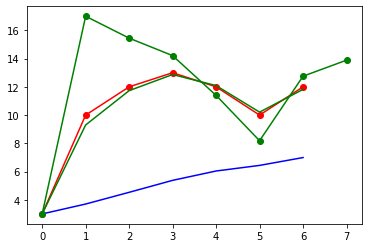

In [42]:
plt.plot(series, 'o-r', label='orignal series')
plt.plot(alpha_1, label='predicted value with single expo alpha = 0.1', color="b")
plt.plot(alpha_9, label='predicted value with single expo alpha = 0.9', color="g")
plt.plot(double_exponential_alpha_09_beta_09, 'o-g', label='predicted value with double expo alpha and beta = 0.9')

#plt.legend()
plt.show()

In [29]:
# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          value = result[-1]
        else:
          value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

double_exponential_alpha_09_beta_09 = double_exponential_smoothing(series, alpha=0.9, beta=0.9)
# [3, 17.0, 15.45, 14.210500000000001, 11.396044999999999, 8.183803049999998, 12.753698384500002, 13.889016464000003]


In [43]:
series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]

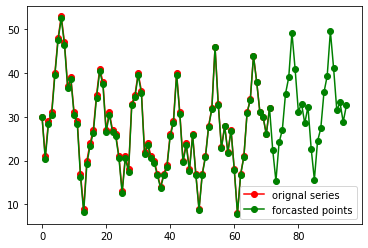

In [48]:
plt.plot(series, 'o-r', label='orignal series')
plt.plot(forcasted_points, 'o-g', label='forcasted points')
plt.legend()
plt.show()

In [47]:
# Initial Trend
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

# >>> initial_trend(series, 12)
# -0.7847222222222222

#Initial Seasonal Components
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

# >>> initial_seasonal_components(series, 12)
# {0: -7.4305555555555545, 1: -15.097222222222221, 2: -7.263888888888888, 3: -5.097222222222222, 4: 3.402777777777778, 5: 8.069444444444445, 6: 16.569444444444446, 7: 9.736111111111112, 8: -0.7638888888888887, 9: 1.902777777777778, 10: -3.263888888888889, 11: -0.7638888888888887}


def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

# # forecast 24 points (i.e. two seasons)
forcasted_points = triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)
# [30, 20.34449316666667, 28.410051892109554, 30.438122252647577, 39.466817731253066, ...